In [1]:
!unzip "/content/Pandas-Data-Science-Tasks-master.zip" -d "/content/data_analysis/"

Archive:  /content/Pandas-Data-Science-Tasks-master.zip
8b511cdf8aeea304bb64710784db29548414b736
   creating: /content/data_analysis/Pandas-Data-Science-Tasks-master/
   creating: /content/data_analysis/Pandas-Data-Science-Tasks-master/Misc/
  inflating: /content/data_analysis/Pandas-Data-Science-Tasks-master/Misc/create_data.py  
  inflating: /content/data_analysis/Pandas-Data-Science-Tasks-master/README.md  
   creating: /content/data_analysis/Pandas-Data-Science-Tasks-master/SalesAnalysis/
   creating: /content/data_analysis/Pandas-Data-Science-Tasks-master/SalesAnalysis/Output/
  inflating: /content/data_analysis/Pandas-Data-Science-Tasks-master/SalesAnalysis/Output/all_data.csv  
  inflating: /content/data_analysis/Pandas-Data-Science-Tasks-master/SalesAnalysis/SalesAnalysis.ipynb  
   creating: /content/data_analysis/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/
  inflating: /content/data_analysis/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime,date
import numpy as np

In [3]:
#merging 12 months of data in a single file

In [8]:
df = pd.read_csv('/content/data_analysis/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv')

files = [file for file in os.listdir('/content/data_analysis/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]
all_months_data = pd.DataFrame()
for file in files:
  df = pd.read_csv('/content/data_analysis/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/' + file)
  all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index = False)

In [2]:
all_data = pd.read_csv('/content/all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


## Q1 What was the best month for sales? How much was earned that month?

In [22]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Month                 0
dtype: int64

In [23]:
all_data.drop(columns='Month')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"
...,...,...,...,...,...,...
186845,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
186846,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
186847,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
186848,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


In [35]:
all_data = all_data.dropna()
all_data.head()
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

In [38]:
all_data = all_data[all_data['Month'] != 'Or']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11
...,...,...,...,...,...,...,...
186845,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001",01
186846,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016",01
186847,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035",01
186848,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001",01


In [39]:
# adding month column
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11


In [42]:
all_data[['Quantity Ordered', 'Price Each']] = all_data[['Quantity Ordered', 'Price Each']].astype('float32')

In [43]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [44]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,278797,Wired Headphones,1.0,11.990000,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.990000
1,278798,USB-C Charging Cable,2.0,11.950000,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.900000
2,278799,Apple Airpods Headphones,1.0,150.000000,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.000000
3,278800,27in FHD Monitor,1.0,149.990005,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.990005
4,278801,Bose SoundSport Headphones,1.0,99.989998,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.989998


In [45]:
all_data.groupby('Month').sum()

<ipython-input-45-d881b5762253>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby('Month').sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903.0,1811768.375,1822256.75
2,13449.0,2188884.750,2202022.50
3,17005.0,2791207.750,2807100.25
4,20558.0,3367671.000,3390670.25
5,18667.0,3135125.000,3152606.75
6,15253.0,2562025.500,2577802.25
7,16072.0,2632539.500,2647775.75
8,13448.0,2230345.500,2244467.75
9,13109.0,2084992.125,2097560.00


In [52]:
results = all_data.groupby('Month').sum()

<ipython-input-52-d9e765394c87>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('Month').sum()


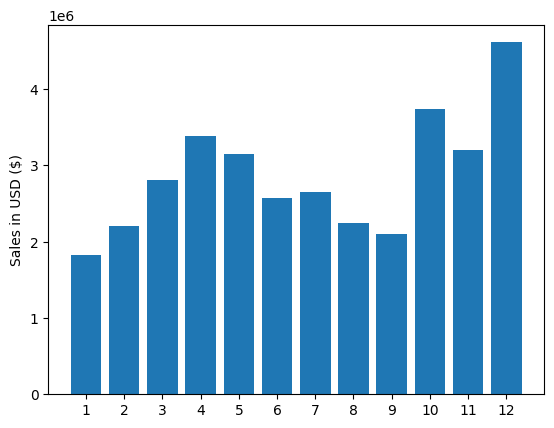

In [53]:
month = range(1, 13)
plt.bar(month, results['Sales'])
plt.xticks(month)
plt.ylabel("Sales in USD ($)")
plt.show()

## Q-2 what city had the highest number of sales?

In [55]:
#using apply method

In [62]:
def get_city(address):
  return address.split(',')[1]
def get_state(address):
  return address.split(',')[2].split(" ")[1]

In [65]:
all_data['Name Of City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x)) + ')'

In [66]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Name Of City
0,278797,Wired Headphones,1.0,11.990000,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.990000,New York City (NY)
1,278798,USB-C Charging Cable,2.0,11.950000,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.900000,Austin (TX)
2,278799,Apple Airpods Headphones,1.0,150.000000,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.000000,Los Angeles (CA)
3,278800,27in FHD Monitor,1.0,149.990005,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.990005,Seattle (WA)
4,278801,Bose SoundSport Headphones,1.0,99.989998,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.989998,Boston (MA)


In [69]:
result_2 = all_data.groupby('Name Of City').sum()
result_2

<ipython-input-69-88defadb2a17>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_2 = all_data.groupby('Name Of City').sum()


,Quantity Ordered,Price Each,Month,Sales
Name Of City,,,,
Atlanta (GA),16602.0,2779908.250,104794,2.795498e+06
Austin (TX),11153.0,1809873.625,69829,1.819582e+06
Boston (MA),22528.0,3637409.750,141112,3.661642e+06
Dallas (TX),16730.0,2752627.750,104620,2.767976e+06
Los Angeles (CA),33289.0,5421435.000,208325,5.452571e+06
New York City (NY),27932.0,4635371.000,175741,4.664318e+06
Portland (ME),2750.0,447189.250,17144,4.497583e+05
Portland (OR),11303.0,1860558.250,70621,1.870732e+06
San Francisco (CA),50239.0,8211461.500,315520,8.262204e+06


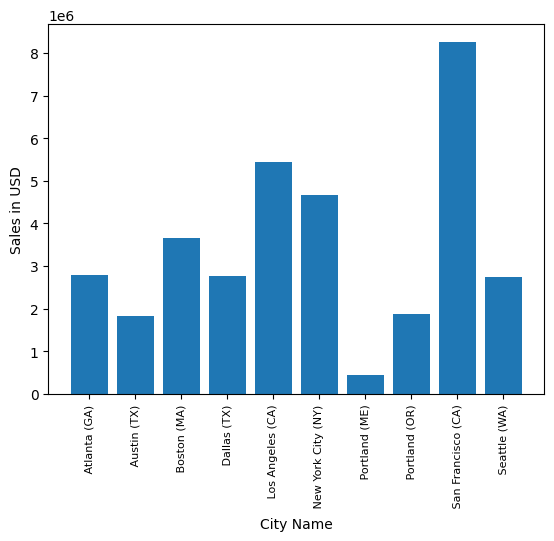

In [77]:
cities = [city for city, df in all_data.groupby('Name Of City')]
plt.bar(cities, result_2['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.xlabel('City Name')
plt.ylabel('Sales in USD')
plt.show()

## Q-3 What time should we display advertisments to maximaize the likelihood of customer's buying product

In [78]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Name Of City
0,278797,Wired Headphones,1.0,11.990000,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11,11.990000,New York City (NY)
1,278798,USB-C Charging Cable,2.0,11.950000,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",11,23.900000,Austin (TX)
2,278799,Apple Airpods Headphones,1.0,150.000000,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",11,150.000000,Los Angeles (CA)
3,278800,27in FHD Monitor,1.0,149.990005,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",11,149.990005,Seattle (WA)
4,278801,Bose SoundSport Headphones,1.0,99.989998,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",11,99.989998,Boston (MA)


In [79]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Name Of City,Hour,Minute
0,278797,Wired Headphones,1.0,11.990000,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11,11.990000,New York City (NY),9,54
1,278798,USB-C Charging Cable,2.0,11.950000,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",11,23.900000,Austin (TX),10,3
2,278799,Apple Airpods Headphones,1.0,150.000000,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",11,150.000000,Los Angeles (CA),14,56
3,278800,27in FHD Monitor,1.0,149.990005,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",11,149.990005,Seattle (WA),22,24
4,278801,Bose SoundSport Headphones,1.0,99.989998,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",11,99.989998,Boston (MA),13,56


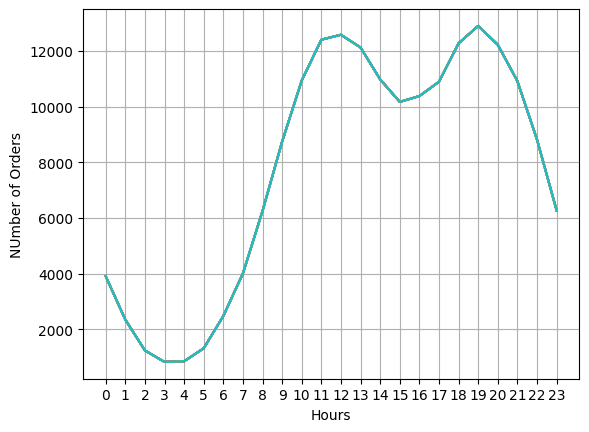

In [83]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(["Hour"]).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('NUmber of Orders')
plt.grid()
plt.show()
# all_data.groupby(['Hour']).count()
plt.show()

## Q-4 What products are most often sold together?

In [85]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Name Of City,Hour,Minute
0,278797,Wired Headphones,1.0,11.990000,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11,11.990000,New York City (NY),9,54
1,278798,USB-C Charging Cable,2.0,11.950000,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",11,23.900000,Austin (TX),10,3
2,278799,Apple Airpods Headphones,1.0,150.000000,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",11,150.000000,Los Angeles (CA),14,56
3,278800,27in FHD Monitor,1.0,149.990005,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",11,149.990005,Seattle (WA),22,24
4,278801,Bose SoundSport Headphones,1.0,99.989998,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",11,99.989998,Boston (MA),13,56


In [87]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Name Of City,Hour,Minute
9,278806,Bose SoundSport Headphones,1.0,99.989998,2019-11-19 19:12:00,"174 2nd St, Boston, MA 02215",11,99.989998,Boston (MA),19,12
10,278806,ThinkPad Laptop,1.0,999.989990,2019-11-19 19:12:00,"174 2nd St, Boston, MA 02215",11,999.989990,Boston (MA),19,12
15,278811,Wired Headphones,1.0,11.990000,2019-11-06 16:01:00,"99 Elm St, San Francisco, CA 94016",11,11.990000,San Francisco (CA),16,1
16,278811,Apple Airpods Headphones,1.0,150.000000,2019-11-06 16:01:00,"99 Elm St, San Francisco, CA 94016",11,150.000000,San Francisco (CA),16,1
24,278819,iPhone,1.0,700.000000,2019-11-04 06:20:00,"880 Maple St, New York City, NY 10001",11,700.000000,New York City (NY),6,20


In [88]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df.head()

<ipython-input-88-2152b98f1d58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Name Of City,Hour,Minute,Grouped
9,278806,Bose SoundSport Headphones,1.0,99.989998,2019-11-19 19:12:00,"174 2nd St, Boston, MA 02215",11,99.989998,Boston (MA),19,12,"Bose SoundSport Headphones, ThinkPad Laptop"
10,278806,ThinkPad Laptop,1.0,999.989990,2019-11-19 19:12:00,"174 2nd St, Boston, MA 02215",11,999.989990,Boston (MA),19,12,"Bose SoundSport Headphones, ThinkPad Laptop"
15,278811,Wired Headphones,1.0,11.990000,2019-11-06 16:01:00,"99 Elm St, San Francisco, CA 94016",11,11.990000,San Francisco (CA),16,1,"Wired Headphones, Apple Airpods Headphones"
16,278811,Apple Airpods Headphones,1.0,150.000000,2019-11-06 16:01:00,"99 Elm St, San Francisco, CA 94016",11,150.000000,San Francisco (CA),16,1,"Wired Headphones, Apple Airpods Headphones"
24,278819,iPhone,1.0,700.000000,2019-11-04 06:20:00,"880 Maple St, New York City, NY 10001",11,700.000000,New York City (NY),6,20,"iPhone, Apple Airpods Headphones"


In [90]:
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
9,278806,"Bose SoundSport Headphones, ThinkPad Laptop"
15,278811,"Wired Headphones, Apple Airpods Headphones"
24,278819,"iPhone, Apple Airpods Headphones"
39,278833,"iPhone, Lightning Charging Cable"
47,278840,"Bose SoundSport Headphones, 27in FHD Monitor"


In [91]:
from itertools import combinations
from collections import Counter

In [94]:
count = Counter()

for row in df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
  print(key, value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80
